In [1]:
import os
from dotenv import load_dotenv

load_dotenv()

True

In [2]:
import sys

IMPL_PATH = os.getenv("IMPL_PATH")
sys.path.append(IMPL_PATH)
DATA_PATH = IMPL_PATH + "/data/"
print(DATA_PATH)

/home/hoangbaoan1901/Documents/information-system_UET/sem5/ai/BTL/INT3401-Midterm/implementations/data/


### PARAMS

In [3]:
TIME_STEP = 6
FUTURE_STEP = 1
N_CLUSTERS = 4

### Training configs:
1. XGB classifier, Random Forest Classifier
2. Random Forest regression, MLP regression

### Load data from pickle files (made from 1_group_data.ipynb)

In [4]:
import pickle
import pandas as pd
import numpy as np

train_4_clusters = pickle.load(open(DATA_PATH + "train_4_clusters.pkl", "rb"))
test_4_clusters = pickle.load(open(DATA_PATH + "test_4_clusters.pkl", "rb"))
train_10_clusters = pickle.load(open(DATA_PATH + "train_10_clusters.pkl", "rb"))
test_10_clusters = pickle.load(open(DATA_PATH + "test_10_clusters.pkl", "rb"))

In [5]:
# More insights
print(type(train_4_clusters))
print(type(train_4_clusters[0]))
print(type(train_4_clusters[0][list(train_4_clusters[0].keys())[0]]))
train_4_clusters[0][list(train_4_clusters[0].keys())[0]].head()

<class 'list'>
<class 'dict'>
<class 'pandas.core.frame.DataFrame'>


date  aws    imerge      tclw     cape       r850       tcwv  \
0 2019-04-05 00:00:00  0.0  0.000000  0.601746  764.875  101.99864  40.422440   
1 2019-04-05 01:00:00  0.0  2.344666  0.718018  718.250  101.55731  40.268112   
2 2019-04-05 02:00:00  0.0  0.000000  0.726501  641.500  100.97389  40.492720   
3 2019-04-05 03:00:00  0.0  0.000000  0.802307  657.750  101.41234  41.193832   
4 2019-04-05 04:00:00  0.0  0.000000  0.789673  768.375  101.11197  41.474990   

         tcw      isor       cin  ...       b14b       b12b        wvb  \
0  41.102127  0.639833  1.234695  ...  284.33180  261.34055  241.05534   
1  41.090378  0.639833  1.609385  ...  269.04214  253.95319  233.24005   
2  41.336470  0.639833  4.781275  ...  265.27927  251.04973  230.30144   
3  42.069046  0.639833  0.922052  ...  250.11890  241.74947  227.51172   
4  42.352478  0.639833  1.031371  ...  269.80673  252.86195  231.27336   

        b10b        i4b       b11b        i2b       b09b       b16b        irb  
0  262.45953  287.18150  281.60117  282.42870  254.15454  269.72195  284.27634  
1  252.26457  285.38474  269.76950  266.40400  244.32185  255.54140  270.90137  
2  248.32812  288.52264  265.98843  262.90793  239.77428  253.72685  266.85617  
3  239.57889  274.33460  251.26399  248.57503  234.14128  242.58984  251.76514  
4  250.37960  293.51816  269.01328  267.80804  241.04387  257.99274  270.40110  

[5 rows x 22 columns]

### For each month, for each cluster, convert the dictionary into corresponding X and y

In [6]:
import data_processors as dp
ts_processor = dp.TimeSeriesProcessor(time_step=TIME_STEP, future_step=FUTURE_STEP)
train_4_clustered_list = []
test_4_clustered_list = []
train_10_clustered_list = []
test_10_clustered_list = []

for cluster in range(N_CLUSTERS):
	train_4_clustered_list.append(ts_processor.get_sequence_data_for_cluster(train_4_clusters[cluster]))
	test_4_clustered_list.append(ts_processor.get_sequence_data_for_cluster(test_4_clusters[cluster]))
	train_10_clustered_list.append(ts_processor.get_sequence_data_for_cluster(train_10_clusters[cluster]))
	test_10_clustered_list.append(ts_processor.get_sequence_data_for_cluster(test_10_clusters[cluster]))

df.shape: (1032, 22)
find_continuous: len(continuous_dfs): 58
create_sequence_data: X shape: (48, 6, 21), y shape: (48,)
create_sequence_data: X shape: (17, 6, 21), y shape: (17,)
create_sequence_data: X shape: (15, 6, 21), y shape: (15,)
create_sequence_data: X shape: (14, 6, 21), y shape: (14,)
create_sequence_data: X shape: (7, 6, 21), y shape: (7,)
time_step + future_step - 1 = 6 must be less than the length of the DataFrame(1)
time_step + future_step - 1 = 6 must be less than the length of the DataFrame(3)
create_sequence_data: X shape: (14, 6, 21), y shape: (14,)
create_sequence_data: X shape: (15, 6, 21), y shape: (15,)
create_sequence_data: X shape: (14, 6, 21), y shape: (14,)
create_sequence_data: X shape: (15, 6, 21), y shape: (15,)
create_sequence_data: X shape: (18, 6, 21), y shape: (18,)
create_sequence_data: X shape: (40, 6, 21), y shape: (40,)
create_sequence_data: X shape: (9, 6, 21), y shape: (9,)
time_step + future_step - 1 = 6 must be less than the length of the Data

In [7]:
# test for april training data
print(len(train_4_clustered_list)) # 4 Cluster
train_4_cluster_0 = train_4_clustered_list[0] # lots of train data
print(type(train_4_cluster_0))
X, y = train_4_cluster_0
print(X.shape)
print(y.shape)

# Count number of nan values
print(np.sum(np.isnan(X)))
print(np.sum(np.isnan(y)))

# Count number of 0 values
print(np.sum(X == 0))
print(np.sum(y == 0))

4
<class 'tuple'>
(23210, 6, 21)
(23210,)
0
0
261524
21581


### Under sampling

In [8]:
from imblearn.under_sampling import RandomUnderSampler
for i in range(N_CLUSTERS):
    for dataset_list in [train_4_clustered_list, train_10_clustered_list]:
        X_train, y_train = dataset_list[i]
        n_samples, time_steps, n_features = X_train.shape
        X_train_flat = X_train.reshape((n_samples, time_steps * n_features))
        y_train_binary = (y_train > 0).astype(int).ravel()  # Ensure y_train_binary is 1D
        rus = RandomUnderSampler()
        X_resampled_flat, y_resampled_binary = rus.fit_resample(X_train_flat, y_train_binary)
        resampled_indices = rus.sample_indices_
        y_resampled = y_train[resampled_indices]
        X_resampled = X_resampled_flat.reshape((-1, time_steps, n_features))
        if (len(y_resampled.shape) == 2):
            raise ValueError("y_resampled shape is not 2D, current shape: ", y_resampled.shape)
        dataset_list[i] = (X_resampled, y_resampled)

### Normalize X features

In [ ]:
from sklearn.preprocessing import MinMaxScaler
for i in range(N_CLUSTERS):
	X_train_4, y_train_4 = train_4_clustered_list[i]
	X_test_4, y_test_4 = test_4_clustered_list[i]
	X_train_10, y_train_10 = train_10_clustered_list[i]
	X_test_10, y_test_10 = test_10_clustered_list[i]
	scaler = MinMaxScaler()
	data_scaler = dp.DataScaler(scaler)
	X_train_4, X_test_4 = data_scaler.scale_data(X_train_4, X_test_4)
	X_train_10, X_test_10 = data_scaler.scale_data(X_train_10, X_test_10)
	train_4_clustered_list[i] = (X_train_4, y_train_4)
	train_10_clustered_list[i] = (X_train_10, y_train_10)
	print(f"y_train_4: {y_train_4.shape}, y_test_4: {y_test_4.sh ape}, y_train_10: {y_train_10.shape}, y_test_10: {y_test_10.shape}")

y_train_4: (3258,), y_test_4: (3170,), y_train_10: (2374,), y_test_10: (65072,)
y_train_4: (6690,), y_test_4: (4857,), y_train_10: (3068,), y_test_10: (33511,)
y_train_4: (8102,), y_test_4: (5035,), y_train_10: (2888,), y_test_10: (55819,)
y_train_4: (3628,), y_test_4: (2418,), y_train_10: (1976,), y_test_10: (41921,)


### LSTM Regression

In [10]:
import matplotlib.pyplot as plt
def draw_scatter_plot(y_true, y_pred, title, model_name, month, cluster, optional=""):
    plt.scatter(y_true, y_pred)
    plt.title(title)
    plt.xlabel("True")
    plt.ylabel("Predicted")
    plt.savefig(RESULT_PATH + f"{model_name}_{month}-ts{TIME_STEP}_fs{FUTURE_STEP}_cluster_{cluster}{optional}.png")
    plt.show()

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


def create_lstm_model(time_step, no_features):
    """one hidden layer with 100 nodes and is trained with a learning rate of 9 × 10−5"""
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(time_step, no_features)),
        tf.keras.layers.LSTM(256, return_sequences=False, activation='relu'),
        tf.keras.layers.Dense(1, activation='relu')
    ])
    return model

2024-11-10 20:05:55.098371: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-10 20:05:55.118316: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-10 20:05:55.124362: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-10 20:05:56.358028: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [12]:
april_models_regression = []
october_models_regression = []

for cluster in range(N_CLUSTERS):
    X_4, y_4 = train_4_clustered_list[cluster]
    X_10, y_10 = train_10_clustered_list[cluster]
    model_4 = create_lstm_model(TIME_STEP, X_4.shape[2])
    model_10 = create_lstm_model(TIME_STEP, X_10.shape[2])
    model_4.compile(optimizer=Adam(learning_rate=9e-5), loss='mse')
    model_10.compile(optimizer=Adam(learning_rate=9e-5), loss='mse')
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    model_4.fit(X_4, y_4, epochs=100, validation_split=0.2, callbacks=[early_stopping])
    model_10.fit(X_10, y_10, epochs=100, validation_split=0.2, callbacks=[early_stopping])
    april_models_regression.append(model_4)
    october_models_regression.append(model_10)

/home/hoangbaoan1901/anaconda3/envs/tf-env/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
I0000 00:00:1731243957.361251  172524 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1731243957.400604  172524 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1731243957.401275  172524 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See 

Epoch 1/100


I0000 00:00:1731243960.777284  172771 service.cc:146] XLA service 0x7f725c003bb0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731243960.777319  172771 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce GTX 1060 6GB, Compute Capability 6.1
2024-11-10 20:06:00.825198: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-11-10 20:06:01.115396: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


40/82 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.6332

I0000 00:00:1731243962.126338  172771 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


82/82 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 2.9188 - val_loss: 16.8512
Epoch 2/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3.6890 - val_loss: 16.8255
Epoch 3/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4.7104 - val_loss: 16.9425
Epoch 4/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3.5252 - val_loss: 16.7540
Epoch 5/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.1961 - val_loss: 16.7166
Epoch 6/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3.3233 - val_loss: 16.7285
Epoch 7/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.4275 - val_loss: 16.7438
Epoch 8/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.9209 - val_loss: 16.7241
Epoch 9/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.8439 - val_loss: 16.8272
Epoch 10/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.4221 - val_loss: 16.8275
Epoch 11/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.6374 - val_loss: 16.7164
Epoch 12/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.6

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
2034/2034 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step
ypred4: (3170, 1), y_test4: (3170,)
ypred10: (65072, 1), y_test10: (65072,)


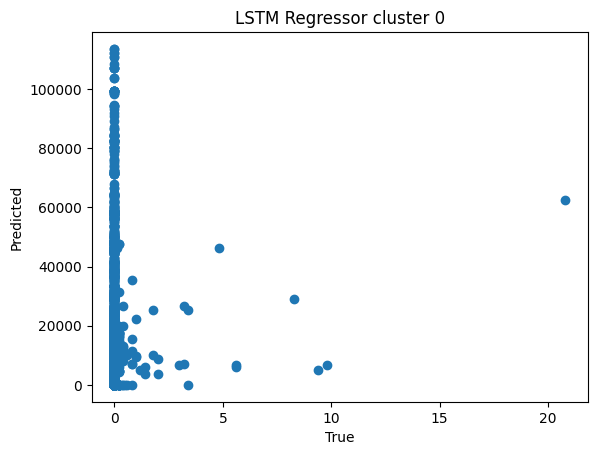

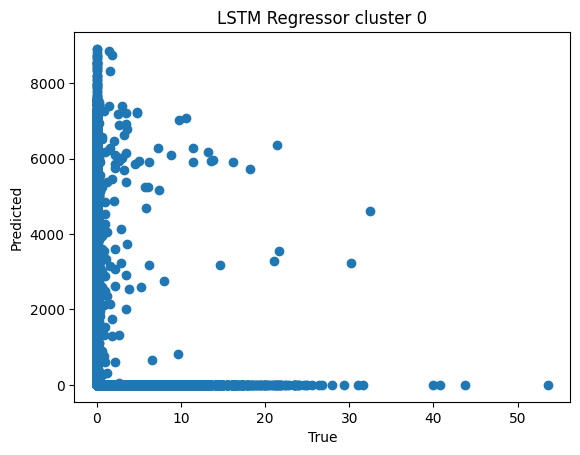

152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
1048/1048 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step
ypred4: (4857, 1), y_test4: (4857,)
ypred10: (33511, 1), y_test10: (33511,)


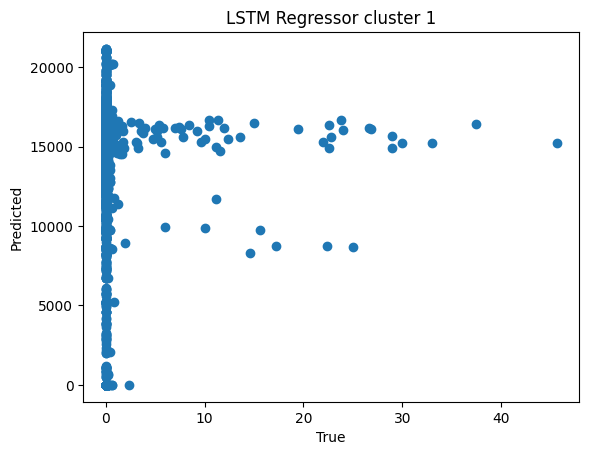

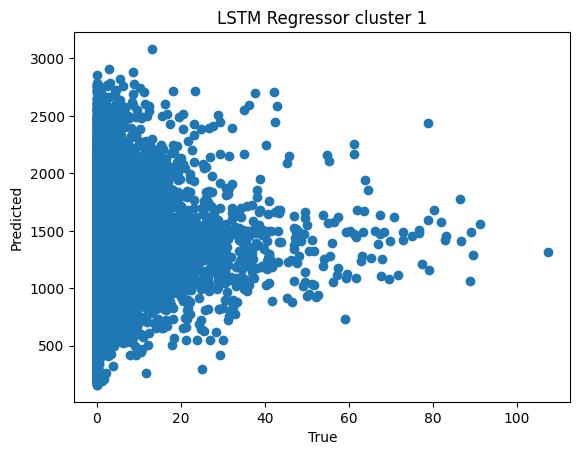

158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
1745/1745 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step
ypred4: (5035, 1), y_test4: (5035,)
ypred10: (55819, 1), y_test10: (55819,)


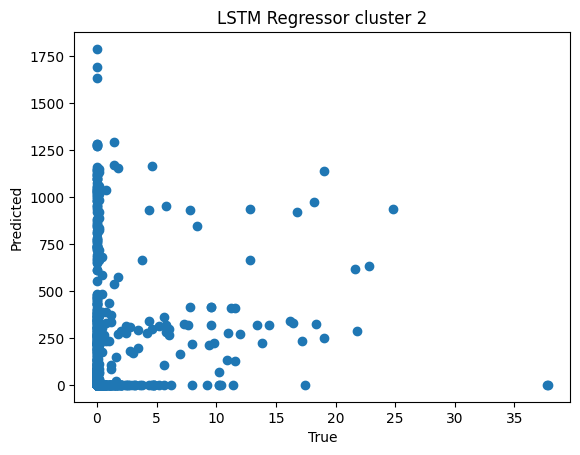

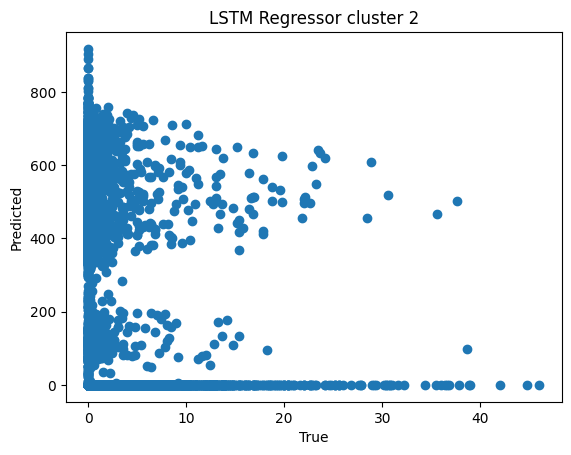

76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step
ypred4: (2418, 1), y_test4: (2418,)
ypred10: (41921, 1), y_test10: (41921,)


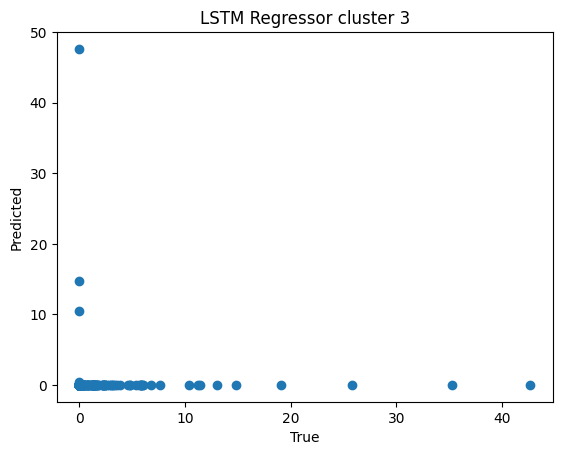

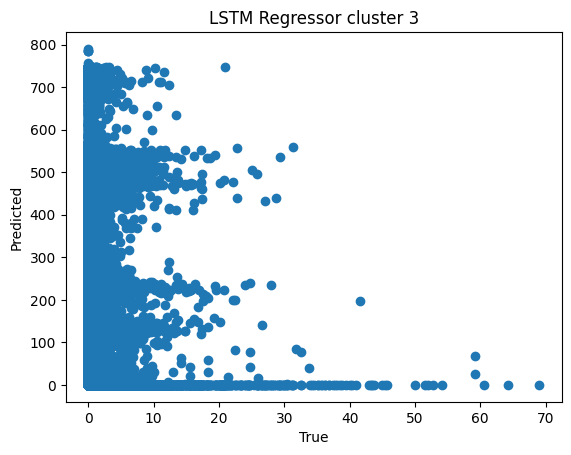

In [14]:
RESULT_PATH = IMPL_PATH + f"/results/LSTM/ts{TIME_STEP}_fs{FUTURE_STEP}/"
if not os.path.exists(RESULT_PATH):
    os.makedirs(RESULT_PATH)

def draw_scatter_plot(y_true, y_pred, title, model_name, month, cluster, optional=""):
    plt.scatter(y_true, y_pred)
    plt.title(title)
    plt.xlabel("True")
    plt.ylabel("Predicted")
    plt.savefig(RESULT_PATH + f"{model_name}_{month}-ts{TIME_STEP}_fs{FUTURE_STEP}_cluster_{cluster}{optional}.png")
    plt.show()

from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error

april_predictions_scores_reg = dict()
october_predictions_scores_reg = dict()

for cluster in range(N_CLUSTERS):
    X_test_4, y_test_4 = test_4_clustered_list[cluster]
    X_test_10, y_test_10 = test_10_clustered_list[cluster]
    model_4 = april_models_regression[cluster]
    model_10 = october_models_regression[cluster]
    y_pred_4 = model_4.predict(X_test_4)
    y_pred_10 = model_10.predict(X_test_10)
    print(f"ypred4: {y_pred_4.shape}, y_test4: {y_test_4.shape}")
    print(f"ypred10: {y_pred_10.shape}, y_test10: {y_test_10.shape}")
    april_predictions_scores_reg[cluster] = {
        "rmse": root_mean_squared_error(y_test_4, y_pred_4),
        "r2": r2_score(y_test_4, y_pred_4),
        "mae": mean_absolute_error(y_test_4, y_pred_4)
    }
    october_predictions_scores_reg[cluster] = {
        "rmse": root_mean_squared_error(y_test_10, y_pred_10),
        "r2": r2_score(y_test_10, y_pred_10),
        "mae": mean_absolute_error(y_test_10, y_pred_10)
    }
    draw_scatter_plot(y_test_4, y_pred_4, f"LSTM Regressor cluster {cluster}", "LSTM", "April", cluster, "_regression")
    draw_scatter_plot(y_test_10, y_pred_10, f"LSTM Regressor cluster {cluster}", "LSTM", "October", cluster, "_regression")


# Save the results
april_predictions_scores_reg_df = pd.DataFrame(april_predictions_scores_reg, index=["rmse", "r2", "mae"])
october_predictions_scores_reg_df = pd.DataFrame(october_predictions_scores_reg, index=["rmse", "r2", "mae"])

april_predictions_scores_reg_df.to_csv(RESULT_PATH + f"april_predictions_scores_reg_df_ts{TIME_STEP}_fs{FUTURE_STEP}.csv")
october_predictions_scores_reg_df.to_csv(RESULT_PATH + f"october_predictions_scores_reg_df_ts{TIME_STEP}_fs{FUTURE_STEP}.csv")